In [1]:
import os 

In [2]:
TAVILY_API_KEY = os.getenv("TAVILY_API_KEY")
LANGCHAIN_TRACING_V2 = os.getenv("LANGCHAIN_TRACING_V2")
LANGCHAIN_ENDPOINT = os.getenv("LANGCHAIN_ENDPOINT")
LANGCHAIN_API_KEY = os.getenv("LANGCHAIN_API_KEY")
LANGCHAIN_PROJECT = os.getenv("LANGCHAIN_PROJECT")
SERPER_API_KEY = os.getenv("SERPER_API_KEY")
GROQ_API_KEY = os.getenv("GROQ_API_KEY")
HUGGINGFACE_API_KEY = os.getenv("HUGGINGFACE_API_KEY")

In [3]:
os.environ["TAVILY_API_KEY"] = TAVILY_API_KEY
os.environ["LANGCHAIN_TRACING_V2"] = LANGCHAIN_TRACING_V2
os.environ["LANGCHAIN_ENDPOINT"] = LANGCHAIN_ENDPOINT
os.environ["LANGCHAIN_API_KEY"] = LANGCHAIN_API_KEY
os.environ["LANGCHAIN_PROJECT"] = LANGCHAIN_PROJECT
os.environ["SERPER_API_KEY"] = SERPER_API_KEY
os.environ["GROQ_API_KEY"] = GROQ_API_KEY
os.environ["HUGGINGFACE_API_KEY"] = HUGGINGFACE_API_KEY

In [4]:
from langchain_huggingface import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")
from langchain_groq import ChatGroq
llm=ChatGroq(model_name="Gemma2-9b-It")

c:\Users\mailm\Documents\langgraph-end-to-end\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
llm.invoke("hello").content

'Hello! 👋 How can I help you today?\n'

In [6]:
from langgraph.graph import StateGraph, MessagesState, START, END
from langgraph.graph.message import add_messages
from typing import Annotated, Literal, TypedDict
from langchain_core.tools import tool
from langchain_core.messages import  HumanMessage
from langgraph.checkpoint.memory import MemorySaver
from langgraph.prebuilt import ToolNode

In [7]:
def call_model(state: MessagesState):
    messages = state['messages']
    response = llm.invoke(messages)
    return {"messages": [response]}

In [8]:
workflow=StateGraph(MessagesState)
workflow.add_node("chatbot", call_model)
workflow.add_edge(START, "chatbot")
workflow.add_edge("chatbot", END)
app = workflow.compile()

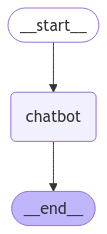

In [9]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [14]:
input = {"messages": ["hi, my name is elon "]}

In [15]:
app.invoke(input)

{'messages': [HumanMessage(content='hi, my name is elon ', additional_kwargs={}, response_metadata={}, id='2b20425b-b078-4242-935d-fa2700df15ba'),
  AIMessage(content="Hi Elon, it's nice to meet you! 👋 \n\nWhat can I do for you today?  🚀\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 27, 'prompt_tokens': 17, 'total_tokens': 44, 'completion_time': 0.049090909, 'prompt_time': 8.749e-05, 'queue_time': 0.013114269999999999, 'total_time': 0.049178399}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-55bec786-cc7c-4f3b-b2df-47dda9da635b-0', usage_metadata={'input_tokens': 17, 'output_tokens': 27, 'total_tokens': 44})]}

In [16]:
for output in app.stream(input):
    for key, value in output.items():
        print(f"Output from {key}  Node")
        print("---------")
        print(value)
        print("\n")

Output from chatbot  Node
---------
{'messages': [AIMessage(content="Hi Elon, it's nice to meet you! \n\nIs there anything I can help you with today? 😊  \n\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 29, 'prompt_tokens': 17, 'total_tokens': 46, 'completion_time': 0.052727273, 'prompt_time': 7.9349e-05, 'queue_time': 0.013527561, 'total_time': 0.052806622}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-fbd38a57-5419-4c35-afab-97d21f9c45b4-0', usage_metadata={'input_tokens': 17, 'output_tokens': 29, 'total_tokens': 46})]}


